In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

In [3]:
#1. read in the dataset
data = pd.read_table('tetrahymena.tsv')

In [4]:
data[:3]

,glucose,conc,diameter,culture
0,glucose_yes,631048,21.140792,1
1,glucose_yes,592007,21.498718,2
2,glucose_yes,562977,21.352325,3


In [4]:
#2. Filter out excessively small and large cells with diameter <=19.2 or >=26.0

subset=data.loc[(data.diameter>19.2)|(data.diameter<26)]


In [5]:
#3.Use the mean concentration and diameter over the technical replicates
data_mean_conc_dia=subset.groupby('culture').mean()


In [6]:
unique_data=subset.loc[:50,['glucose','culture']]

In [7]:
merge=data_mean_conc_dia.merge(unique_data,on="culture")

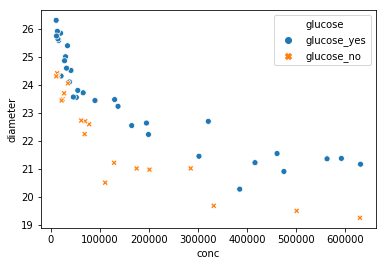

In [8]:
#5. create a scatter plot of concentration versus diameter; 
#show the glucose status by plotting a different shape and color for points with and without glucose added. Save as a pdf.
conc_diam_scatter = sns.scatterplot(x="conc", y="diameter", hue="glucose",style="glucose",data=merge)
plt.savefig("conc_diam_scatter.pdf")

In [9]:
#6.create new columns "log_concentration" and "log_diameter" that have the natural log of concentration and diameter respectively
merge['log_concentration']= np.log(merge.conc)
merge['log_diameter']=np.log(merge.diameter)

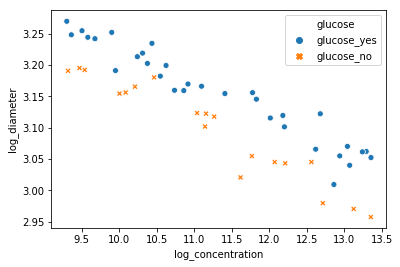

In [10]:
#7.create a scatter plot of log concentration versus log diameter 
#(if this is linear then the variables are related by a power law- is this the case?); 
#show the glucose status by plotting a different shape and color for points with and without glucose added. Save as a pdf
log_conc_diam_scatter = sns.scatterplot(x="log_concentration", y="log_diameter", hue="glucose",style="glucose",data=merge)
plt.savefig("log_conc_diam_scatter.pdf")

In [11]:
print(merge)

    culture      conc   diameter      glucose  log_concentration  log_diameter
0         1  631155.5  21.166891  glucose_yes          13.355308      3.052438
1         2  592097.0  21.374168  glucose_yes          13.291426      3.062183
2         3  562915.0  21.359864  glucose_yes          13.240884      3.061514
3         4  475049.5  20.906823  glucose_yes          13.071174      3.040076
4         5  461040.5  21.548492  glucose_yes          13.041241      3.070306
5         6  416113.0  21.222879  glucose_yes          12.938712      3.055080
6         7  384960.5  20.276008  glucose_yes          12.860896      3.009438
7         8  320976.0  22.696857  glucose_yes          12.679122      3.122226
8         9  301930.5  21.450353  glucose_yes          12.617952      3.065741
9        10  199006.5  22.228682  glucose_yes          12.201093      3.101383
10       11  194917.0  22.636345  glucose_yes          12.180329      3.119557
11       12  164860.0  22.545067  glucose_yes       